In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winemagdata130kv2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df.shape

(129971, 14)

In [4]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [5]:
description = df['description']
description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [7]:
import nltk

In [8]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
sia = SentimentIntensityAnalyzer()

In [15]:
example1 = description[0]
example1

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [16]:
sia.polarity_scores(example1)

{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'compound': 0.1531}

In [23]:
res = {}
for x, row in tqdm(df.iterrows(), total = len(df)):
    text = row['description']
    ID = row['taster_name']
    res[ID] = sia.polarity_scores(text)

  0%|          | 0/129971 [00:00<?, ?it/s]

In [24]:
res

{'Kerin O’Keefe': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Roger Voss': {'neg': 0.047, 'neu': 0.723, 'pos': 0.23, 'compound': 0.7003},
 'Paul Gregutt': {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.5267},
 'Alexander Peartree': {'neg': 0.0,
  'neu': 0.856,
  'pos': 0.144,
  'compound': 0.5719},
 'Michael Schachner': {'neg': 0.024,
  'neu': 0.812,
  'pos': 0.163,
  'compound': 0.8553},
 'Anna Lee C. Iijima': {'neg': 0.0,
  'neu': 0.834,
  'pos': 0.166,
  'compound': 0.7331},
 'Virginie Boone': {'neg': 0.0,
  'neu': 0.923,
  'pos': 0.077,
  'compound': 0.4404},
 'Matt Kettmann': {'neg': 0.091,
  'neu': 0.879,
  'pos': 0.03,
  'compound': -0.6327},
 nan: {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.5574},
 'Sean P. Sullivan': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Jim Gordon': {'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.7655},
 'Joe Czerwinski': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Anne Krebiehl\xa0MW': {'ne

In [25]:
views = pd.DataFrame(res).T
views

,neg,neu,pos,compound
Kerin O’Keefe,0.000,1.000,0.000,0.0000
Roger Voss,0.047,0.723,0.230,0.7003
Paul Gregutt,0.000,0.914,0.086,0.5267
Alexander Peartree,0.000,0.856,0.144,0.5719
Michael Schachner,0.024,0.812,0.163,0.8553
Anna Lee C. Iijima,0.000,0.834,0.166,0.7331
Virginie Boone,0.000,0.923,0.077,0.4404
Matt Kettmann,0.091,0.879,0.030,-0.6327
NaN,0.000,0.886,0.114,0.5574
Sean P. Sullivan,0.000,1.000,0.000,0.0000


In [26]:
views.head()

,neg,neu,pos,compound
Kerin O’Keefe,0.000,1.000,0.000,0.0000
Roger Voss,0.047,0.723,0.230,0.7003
Paul Gregutt,0.000,0.914,0.086,0.5267
Alexander Peartree,0.000,0.856,0.144,0.5719
Michael Schachner,0.024,0.812,0.163,0.8553


In [27]:
views.tail()

,neg,neu,pos,compound
Jeff Jenssen,0.000,0.790,0.210,0.8074
Susan Kostrzewa,0.000,0.770,0.230,0.9209
Carrie Dykes,0.072,0.850,0.078,0.1027
Fiona Adams,0.000,0.974,0.026,0.0258
Christina Pickard,0.000,0.862,0.138,0.2960


In [31]:
views = views.reset_index().rename(columns={'Index' :'ID'})
views

,index,neg,neu,pos,compound
0,Kerin O’Keefe,0.000,1.000,0.000,0.0000
1,Roger Voss,0.047,0.723,0.230,0.7003
2,Paul Gregutt,0.000,0.914,0.086,0.5267
3,Alexander Peartree,0.000,0.856,0.144,0.5719
4,Michael Schachner,0.024,0.812,0.163,0.8553
5,Anna Lee C. Iijima,0.000,0.834,0.166,0.7331
6,Virginie Boone,0.000,0.923,0.077,0.4404
7,Matt Kettmann,0.091,0.879,0.030,-0.6327
8,NaN,0.000,0.886,0.114,0.5574
9,Sean P. Sullivan,0.000,1.000,0.000,0.0000


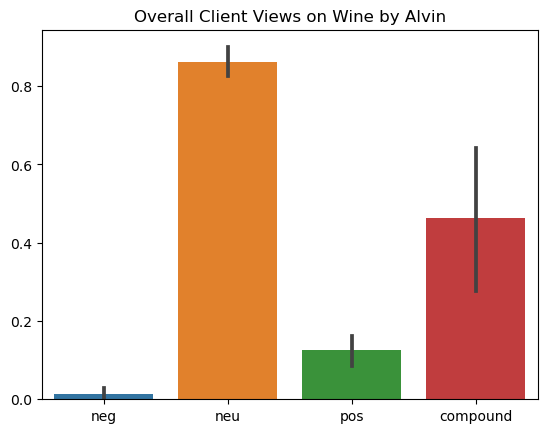

In [33]:
overall_views = sns.barplot(data=views)
overall_views.set_title('Overall Client Views on Wine by Alvin')
plt.show()

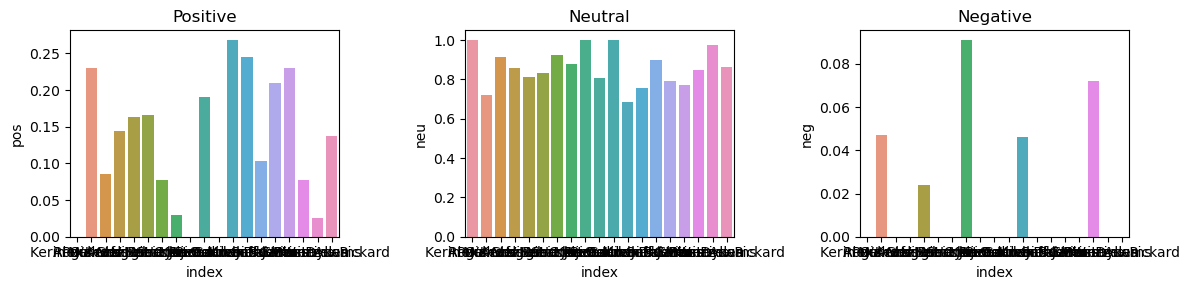

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=views, x ='index', y='pos', ax = axs[0])
sns.barplot(data=views, x ='index', y='neu', ax = axs[1])
sns.barplot(data=views, x ='index', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()